In [42]:
# Importing Libraries
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [43]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Checking the Encoding used in the dataset
import chardet 

with open('IMDb Movies India.csv', 'rb') as filedata:
    result = chardet.detect(filedata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [45]:
# Read CSV file (Dataset)
data = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Shaping the data into Rows & Columns
data.shape

(15509, 10)

In [47]:
# Counting the number of Rows & Columns in the Data 
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 15509
Number of Columns 10


In [48]:
# Information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


-------------------------------------------------------------------------------------------------------------------------------------------------

Checking Missing Values

In [49]:
# Finding is there any missing data present or not 
print("Any missing value?",data.isnull().values.any())

Any missing value? True


In [50]:
# Finding the counts for the missing data for every columns
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

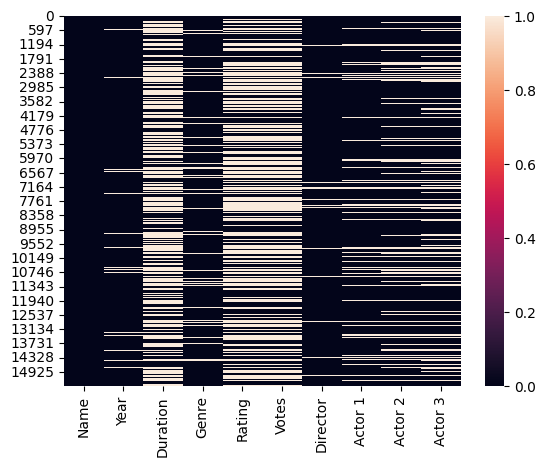

In [51]:
# Visualizing the Missing values
sns.heatmap(data.isnull()) 

In [52]:
# Missing percentages for each columns
per_missing = data.isnull().sum() * 100 / len(data) 
per_missing

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

Handling Missing Values

In [53]:
# Replacing all the missing values 
data.dropna(inplace=True)
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [54]:
# Counting number of rows & number of columns
data.shape 

(5659, 10)

In [55]:
# again checking for any missing values in percentage
per_missing = data.isnull().sum() * 100 / len(data) 
per_missing

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

Check for Duplicate Values

In [56]:
dup_data = data.duplicated().any()
print("Are there any duplicate values?",dup_data) 
# if duplicate data is found, then use --> data = data.drop_duplicates()

Are there any duplicate values? False


In [57]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


Overall Statistics About the DataFrame

In [58]:
data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659.000000,5659,5659,5659,5659,5659
unique,5385,91,174,376,NaN,2027,2431,1960,2321,2556
top,Baazi,(2019),120 min,Drama,NaN,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,NaN,90,41,104,52,57
mean,NaN,NaN,NaN,NaN,5.898533,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381165,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


Visualizing the Pre-Processed Data 

<Axes: xlabel='Year', ylabel='count'>

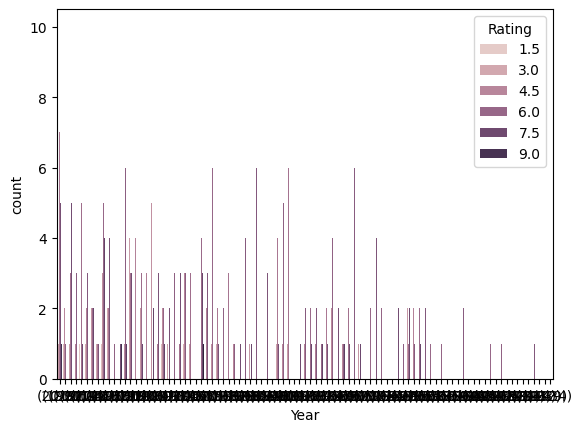

In [59]:
sns.countplot(x=data['Year'], hue=data['Rating'])

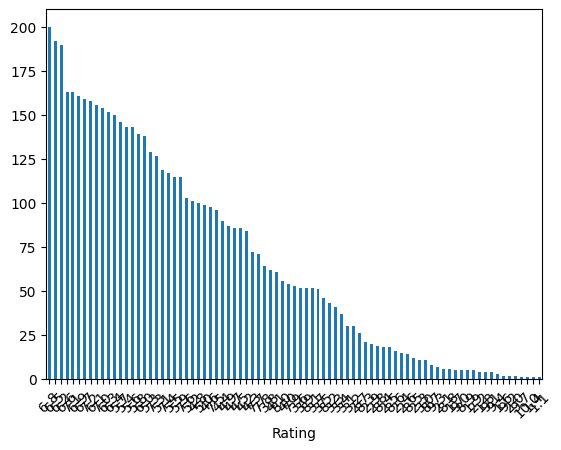

In [60]:
# Visualizing Rating value counts
data['Rating'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [61]:
data['Year'].value_counts() # display number of Movies per year

Year
(2019)    227
(2017)    211
(2018)    202
(2015)    177
(2016)    173
         ... 
(1931)      2
(1939)      2
(1934)      2
(1933)      1
(1932)      1
Name: count, Length: 91, dtype: int64

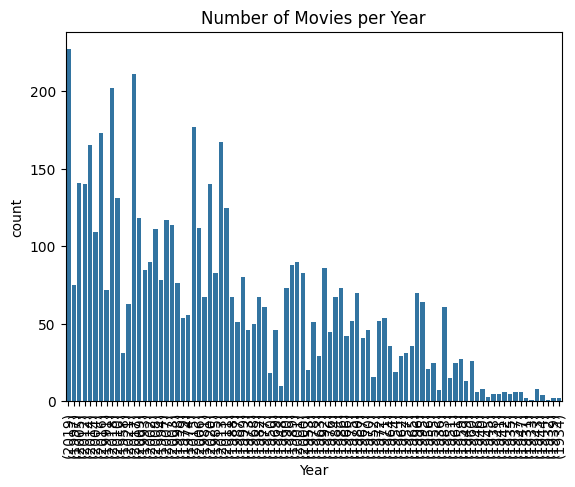

In [62]:
# Visualizing number of Movies per year
sns.countplot(x='Year',data=data) 
plt.title("Number of Movies per Year")
plt.xticks(rotation=90)
plt.show()

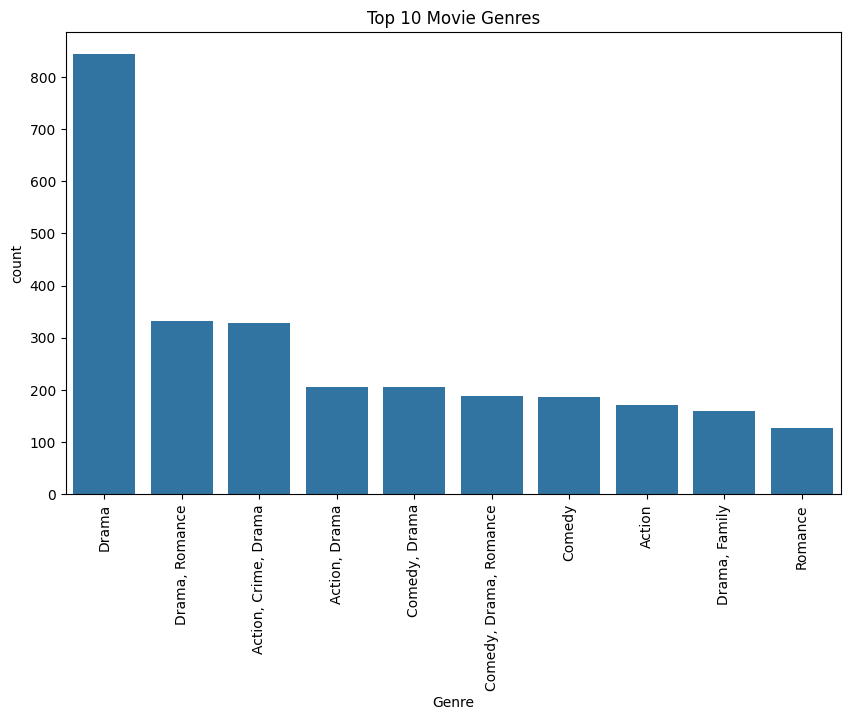

In [63]:
# Get Top 10 genres by count 
top_genres = data['Genre'].value_counts().nlargest(10).index

# filter the DataFrame to include only the Top 10 genres
data_top_genres = data[data['Genre'].isin(top_genres)]

# ploting the count plot for Top 10 genres
plt.figure(figsize=(10,6))
sns.countplot(x='Genre',data=data_top_genres, order=top_genres)
plt.title("Top 10 Movie Genres")
plt.xticks(rotation=90)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------

Concatenating the differentiating factors of the Dataset

In [64]:
import hashlib

# Assuming df is your DataFrame and it has columns 'movie_name', 'year', 'genre', 'director', 'actor1', 'actor2'
data['unique_id'] = data.apply(lambda row: hashlib.md5((row['Name'] + str(row['Year']) + row['Genre'] + row['Director'] + row['Actor 1'] + row['Actor 2'] + row['Actor 3']).encode()).hexdigest(), axis=1)

# Convert the hexdigest to a float
data['unique_id'] = data['unique_id'].apply(lambda x: float(int(x, 16)) % 10**8)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       5659 non-null   object 
 1   Year       5659 non-null   object 
 2   Duration   5659 non-null   object 
 3   Genre      5659 non-null   object 
 4   Rating     5659 non-null   float64
 5   Votes      5659 non-null   object 
 6   Director   5659 non-null   object 
 7   Actor 1    5659 non-null   object 
 8   Actor 2    5659 non-null   object 
 9   Actor 3    5659 non-null   object 
 10  unique_id  5659 non-null   float64
dtypes: float64(2), object(9)
memory usage: 530.5+ KB


In [66]:
X = data['unique_id'].values.reshape(-1,1)
y = data['Rating'].values.reshape(-1,1)

Splitting data into Training and Testing data

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


-------------------------------------------------------------------------------------------------------------------------------------------------

Training Model on Liner Regression

In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)

In [72]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1142156219068406
Mean Squared Error: 1.8823771935852107
Root Mean Squared Error: 1.3719975195258958
